Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# 数据预处理 Pre-Processing:
- 去重
- 去除代号鸢相关
- 只看中文(language column是'Zhong Wen -Pu Tong Hua  Guo Yu')

In [ ]:
# 读数据
df = pd.read_csv('/content/drive/MyDrive/sanguo_data/liu_bei_fic_meta.csv')
df.shape

(613, 23)

In [ ]:
# 去重
df = df.drop_duplicates(subset=['work_id'])
df.shape

(611, 23)

In [ ]:
# 去除代号鸢
def filter_fandom(x):
  if '代号鸢' not in x:
      return True
  else:
      return False
filtered = df[df['fandom'].apply(filter_fandom)]
filtered.shape

(606, 23)

In [ ]:
# 只留下中文文
filtered = filtered[filtered['language'] == 'Zhong Wen -Pu Tong Hua  Guo Yu']
filtered.shape

(502, 23)

In [ ]:
filtered.head()

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,warnings,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
0,55809304,倾覆之巢,['JellyEvelynn'],Mature,Other,삼국지톡 | The Chat of the Three Kingdoms (Webcomi...,Gongsun Zan | Gongsun Bogui/Liu Bei | Liu Xuan...,"Gongsun Zan | Gongsun Bogui, Liu Bei | Liu Xua...","单方面性转, 三角关系",Major Character Death,...,2024-05-10,"23,323",1/1,NaN,2,1.0,20,['Winwaio'],[],NaN
1,41236662,将军白发征夫泪,['PenMound'],General Audiences,"Gen, F/M",Chinese History RPF,NaN,"关羽, 于禁, 蔡琰, 曹操, 关平, 孙权, 虞翻, 吕蒙, 糜芳, 徐夫人, 庞德, 于...",NaN,"Graphic Depictions Of Violence, Major Characte...",...,2024-05-10,"126,343",74/74,83.0,25,4.0,"1,450","['wandming', 'Ahona_SUriel', 'Syansol', 'frost...",[],NaN
2,49032004,喧宾夺主,['Mojos'],Mature,M/M,三国,法玄,"法正, 刘备",NaN,Creator Chose Not To Use Archive Warnings,...,2024-05-08,"84,169",19/?,118.0,63,11.0,"2,063","['Freak724', 'Ruaaaaa', 'Atomy', 'Allonautilus...",[],NaN
3,55757461,天壤刘郎,['PenMound'],General Audiences,Gen,Chinese History RPF,NaN,"孙尚香, 孙权, 吴夫人, 周瑜, 刘备",NaN,Creator Chose Not To Use Archive Warnings,...,2024-05-07,"2,203",1/1,NaN,NaN,NaN,26,[],[],NaN
4,55702633,铜雀台无惨文学大纲,['Allegro_1'],Mature,M/M,"三国历史 | Three Kingdoms History RPF, San Guo | T...","玄亮, 玄法, 曹亮 - Relationship","曹操, 刘备, 诸葛亮, 法正",NaN,Creator Chose Not To Use Archive Warnings,...,2024-05-05,"9,732",1/1,2.0,1,NaN,139,[],[],NaN


# CP（无差向）分析

In [ ]:
# there are some that are not related to liu bei
# to make my life easier im going to filter by another round
# the easy part is a lot of ships that have liu bei in it either use the character 刘 or 备 or 玄
# one exception is 水鱼 or 鱼水

def filter_relationship(s):
  try:
    if '刘' in s or '备' in s or '玄' in s:
      return True
    elif '鱼水' in s or '水鱼' in s:
      return True
    elif 'Liu Bei' in s:
      return True
    elif 'Liú Bèi' in s:
      return True
    else:
      return False
  except:
    return False
filtered = filtered[filtered['relationship'].apply(filter_relationship)]
filtered.shape

(418, 23)

In [ ]:
ship_counter = Counter()
for ship_string in filtered['relationship']:
  try:
    ship_list = ship_string.split(', ')
    bei_only = [ship for ship in ship_list if filter_relationship(ship)]
    ship_counter.update(bei_only)
  except:
    pass

In [ ]:
#一共有127个独特的cp tag
len(ship_counter)

127

In [ ]:
#最高频的几个cp tag
ship_counter.most_common(10)

[('刘备/诸葛亮', 125),
 ('玄亮', 106),
 ('Liu Bei | Liu Xuande/Zhuge Liang | Zhuge Kongming', 57),
 ('Gongsun Zan | Gongsun Bogui/Liu Bei | Liu Xuande', 41),
 ('曹刘 - Relationship', 39),
 ('亮玄', 31),
 ('曹操/刘备', 30),
 ('Cao Cao | Cao Mengde/Liu Bei | Liu Xuande', 27),
 ('玄亮 - Relationship', 22),
 ('Guan Yu | Guan Yunchang/Liu Bei | Liu Xuande', 12)]

In [ ]:
filtered = filtered.reset_index()

In [ ]:
#这个是我自己规整出的cp tag合并同列项mapping
map_df = pd.read_excel('/content/drive/MyDrive/sanguo_data/LiuBei_Mapping.xlsx', sheet_name = 'Sheet1')
map_df.head()

,raw,parent,top,bottom,swtich
0,Gongsun Zan | Gongsun Bogui/Liu Bei | Liu Xuande,Gongsun Zan | Gongsun Bogui/Liu Bei | Liu Xuande,NaN,NaN,NaN
1,备瓒,Gongsun Zan | Gongsun Bogui/Liu Bei | Liu Xuande,Liu Bei,Gongsun Zan,NaN
2,刘备/公孙瓒,Gongsun Zan | Gongsun Bogui/Liu Bei | Liu Xuande,Liu Bei,Gongsun Zan,NaN
3,瓒备,Gongsun Zan | Gongsun Bogui/Liu Bei | Liu Xuande,Gongsun Zan,Liu Bei,NaN
4,公孙瓒/刘备,Gongsun Zan | Gongsun Bogui/Liu Bei | Liu Xuande,Gongsun Zan,Liu Bei,NaN


In [ ]:
mapping = {}
for i in range(map_df.shape[0]):
  k = map_df['raw'][i].strip()
  v = map_df['parent'][i].strip()
  mapping[k] = v

len(mapping)

106

In [ ]:
ship_counter_condensed = Counter()
for ship_string in filtered['relationship']:
    try:
        ship_list = ship_string.split(', ')
        ship_list_stripped = [x.strip() for x in ship_list]
        mapped = []
        for x in ship_list_stripped:
            if x in mapping:
                tm = mapping[x]
                mapped.append(tm)
            else:
                pass
        ship_counter_condensed.update(np.unique(mapped))
    except:
        pass

In [ ]:
sorted_ship_counter = dict(sorted(ship_counter_condensed.items(), key=lambda item: item[1], reverse=True))
sorted_ship_counter

{'Liu Bei | Liu Xuande/Zhuge Liang | Zhuge Kongming': 249,
 'Cao Cao | Cao Mengde/Liu Bei | Liu Xuande': 69,
 'Gongsun Zan | Gongsun Bogui/Liu Bei | Liu Xuande': 49,
 'Fa Zheng | Fa Xiaozhi/Liu Bei | Liu Xuande': 20,
 'Guan Yu | Guan Yunchang/Liu Bei | Liu Xuande': 16,
 'Liu Bei | Liu Xuande/Zhao Yun | Zhao Zilong': 14,
 'Others/Liu Bei': 11,
 'Liu Bei / Sun Shangxiang': 8,
 'Jiang Wei | Jiang Boyue/Liu Bei | Liu Xuande': 5,
 'Yuan Shao / Liu Bei': 5,
 'Liu Bei | Liu Xuande/Sun Quan | Sun Zhongmou': 3,
 'Liu Bei / Liu Feng': 3,
 'Cao Pi | Cao Zihuan/Liu Bei | Liu Xuande': 3,
 'Liu Bei / Sun Wukong': 2,
 'Liu Bei | Liu Xuande/Zhou Yu | Zhou Gongjin': 2,
 'Liu Bei | Liu Xuande/Xu Shu | Xu Yuanzhi': 2,
 'Liu Bei/Liu Xie': 2,
 'Kai / Liu Bei': 1,
 'Liu Bei / Wei Yan': 1,
 'Xun Yu / Liu Bei': 1,
 'Liu Bei | Liu Xuande/Pang Tong | Pang Shiyuan': 1,
 'Jian Yong / Liu Bei': 1,
 'Liu Bei / Lady Gan': 1,
 'Cao Zhi / Liu Bei': 1,
 'Chen Dao/Liu Bei': 1}

In [ ]:
len(ship_counter_condensed)

25

In [ ]:
ship_counter_condensed = Counter()

for i in range(filtered.shape[0]):
    try:
        ship_string = filtered['relationship'][i]
        ship_list = ship_string.split(', ')
        ship_list_stripped = [x.strip() for x in ship_list]
        mapped = []
        for x in ship_list_stripped:
            if x in mapping:
                tm = mapping[x]
                mapped.append(tm)
            else:
                pass
        ship_counter_condensed.update(np.unique(mapped))
    except:
        pass

ship_counter_condensed.most_common()

[('Liu Bei | Liu Xuande/Zhuge Liang | Zhuge Kongming', 249),
 ('Cao Cao | Cao Mengde/Liu Bei | Liu Xuande', 69),
 ('Gongsun Zan | Gongsun Bogui/Liu Bei | Liu Xuande', 49),
 ('Fa Zheng | Fa Xiaozhi/Liu Bei | Liu Xuande', 20),
 ('Guan Yu | Guan Yunchang/Liu Bei | Liu Xuande', 16),
 ('Liu Bei | Liu Xuande/Zhao Yun | Zhao Zilong', 14),
 ('Others/Liu Bei', 11),
 ('Liu Bei / Sun Shangxiang', 8),
 ('Jiang Wei | Jiang Boyue/Liu Bei | Liu Xuande', 5),
 ('Yuan Shao / Liu Bei', 5),
 ('Liu Bei | Liu Xuande/Sun Quan | Sun Zhongmou', 3),
 ('Liu Bei / Liu Feng', 3),
 ('Cao Pi | Cao Zihuan/Liu Bei | Liu Xuande', 3),
 ('Liu Bei / Sun Wukong', 2),
 ('Liu Bei | Liu Xuande/Zhou Yu | Zhou Gongjin', 2),
 ('Liu Bei | Liu Xuande/Xu Shu | Xu Yuanzhi', 2),
 ('Liu Bei/Liu Xie', 2),
 ('Kai / Liu Bei', 1),
 ('Liu Bei / Wei Yan', 1),
 ('Xun Yu / Liu Bei', 1),
 ('Liu Bei | Liu Xuande/Pang Tong | Pang Shiyuan', 1),
 ('Jian Yong / Liu Bei', 1),
 ('Liu Bei / Lady Gan', 1),
 ('Cao Zhi / Liu Bei', 1),
 ('Chen Dao/Liu Bei

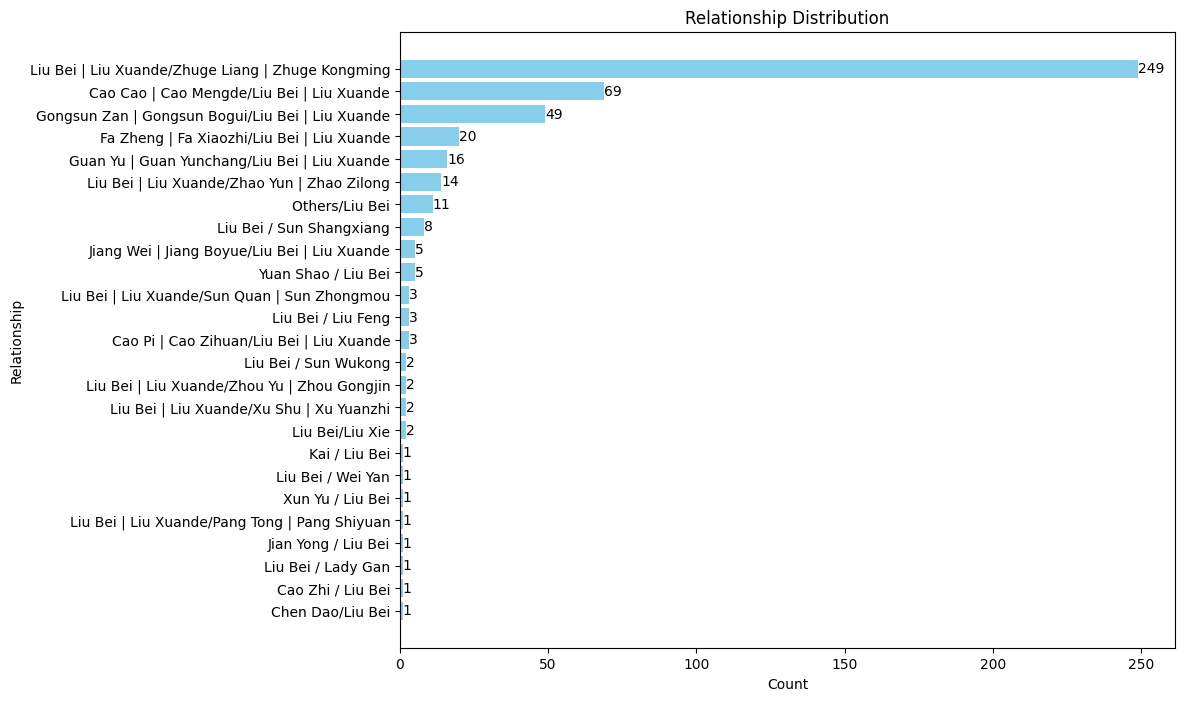

In [ ]:
import matplotlib.pyplot as plt
labels = list(sorted_ship_counter.keys())
counts = list(sorted_ship_counter.values())

plt.figure(figsize=(10, 8))
bars = plt.barh(labels, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Relationship')
plt.title('Relationship Distribution')

for bar, count in zip(bars, counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count}',
             va='center', ha='left', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

In [ ]:
over_10_cnt = [i[0] for i in sorted_ship_counter.items() if i[1]>10]
over_10_cnt

['Liu Bei | Liu Xuande/Zhuge Liang | Zhuge Kongming',
 'Cao Cao | Cao Mengde/Liu Bei | Liu Xuande',
 'Gongsun Zan | Gongsun Bogui/Liu Bei | Liu Xuande',
 'Fa Zheng | Fa Xiaozhi/Liu Bei | Liu Xuande',
 'Guan Yu | Guan Yunchang/Liu Bei | Liu Xuande',
 'Liu Bei | Liu Xuande/Zhao Yun | Zhao Zilong',
 'Others/Liu Bei']

In [ ]:
kudos_dict = {}
#initialize dict
for ship in over_10_cnt:
  kudos_dict[ship] = []

for i in range(len(filtered['relationship'])):
    try:
        ship_string = filtered['relationship'][i]
        ship_list = ship_string.split(', ')
        ship_list_stripped = [x.strip() for x in ship_list]
        mapped = []
        for x in ship_list_stripped:
            if x in mapping:
                tm = mapping[x]
                mapped.append(tm)
            else:
                pass
        deduped = np.unique(mapped)
        for ship in deduped:
          if ship in kudos_dict:
            kudos_dict[ship].append(int(filtered['kudos'][i]))
    except:
        pass

In [ ]:
shortened_label = [k.replace("Liu Bei | Liu Xuande", "").replace("Liu Bei","").replace("/","") for k in kudos_dict.keys()]
shortened_label

['Zhuge Liang | Zhuge Kongming',
 'Cao Cao | Cao Mengde',
 'Gongsun Zan | Gongsun Bogui',
 'Fa Zheng | Fa Xiaozhi',
 'Guan Yu | Guan Yunchang',
 'Zhao Yun | Zhao Zilong',
 'Others']

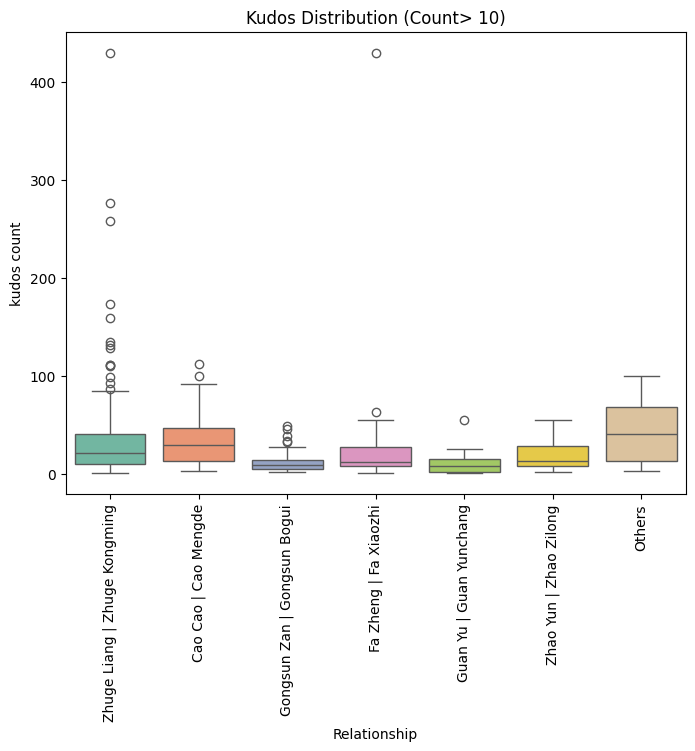

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=kudos_dict, palette = "Set2")
plt.title('Kudos Distribution (Count> 10)')
plt.xlabel('Relationship')
plt.xticks(ticks=plt.xticks()[0], labels=shortened_label)
plt.xticks(rotation=90)
plt.ylabel('kudos count')
plt.show()

In [ ]:
words_dict = {}
#initialize dict
for ship in over_10_cnt:
  words_dict[ship] = []

for i in range(len(filtered['relationship'])):
    try:
        ship_string = filtered['relationship'][i]
        ship_list = ship_string.split(', ')
        ship_list_stripped = [x.strip() for x in ship_list]
        mapped = []
        for x in ship_list_stripped:
            if x in mapping:
                tm = mapping[x]
                mapped.append(tm)
            else:
                pass
        deduped = np.unique(mapped)
        for ship in deduped:
          if ship in words_dict:
            words_dict[ship].append(int(filtered['words'][i].replace(",","")))
    except:
        pass

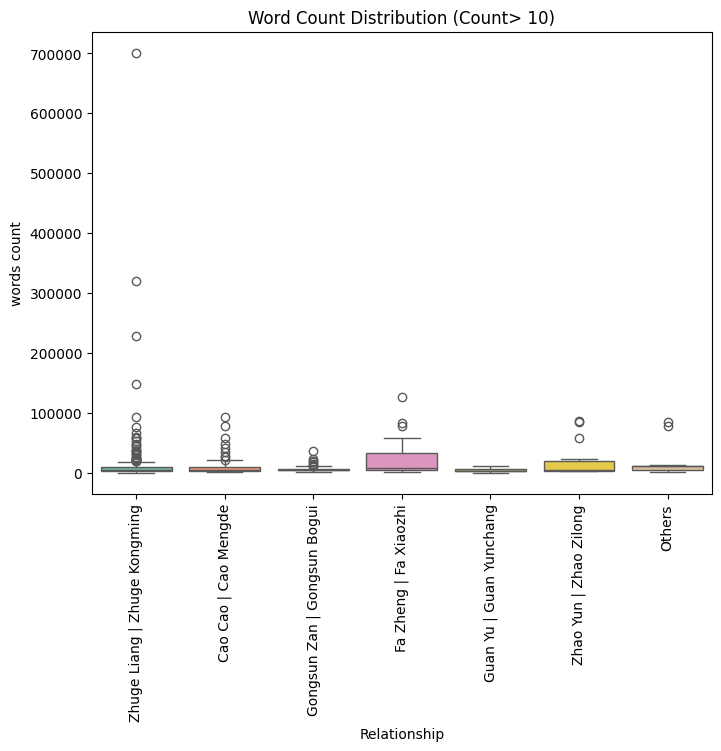

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=words_dict, palette = "Set2")
plt.title('Word Count Distribution (Count> 10)')
plt.xlabel('Relationship')
plt.xticks(ticks=plt.xticks()[0], labels=shortened_label)
plt.xticks(rotation=90)
plt.ylabel('words count')
plt.show()

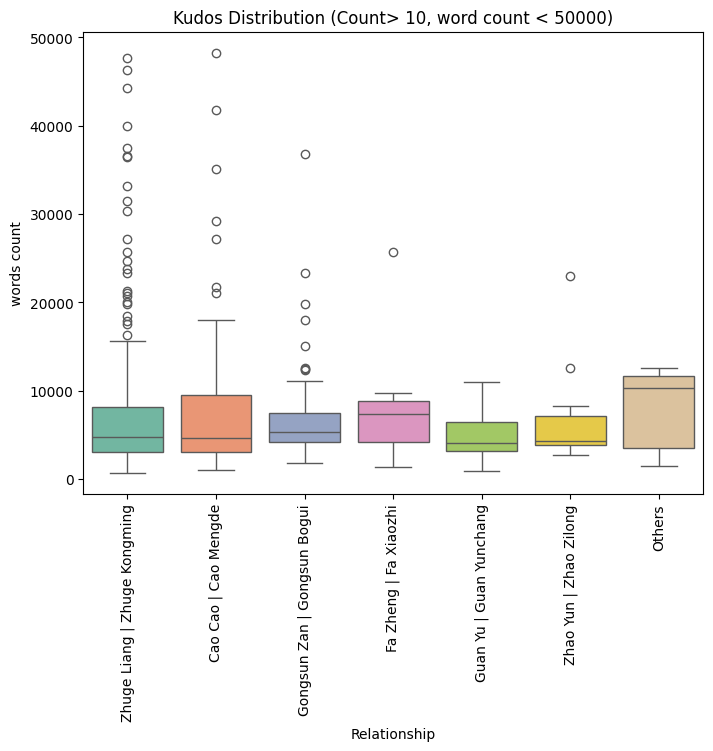

In [ ]:
words_dict_rm_outlier = words_dict

for key, value in words_dict_rm_outlier.items():
    words_dict_rm_outlier[key] = [x for x in value if x < 50000]

plt.figure(figsize=(8, 6))
sns.boxplot(data=words_dict_rm_outlier, palette = "Set2")
plt.title('Kudos Distribution (Count> 10, word count < 50000)')
plt.xlabel('Relationship')
plt.xticks(ticks=plt.xticks()[0], labels=shortened_label)
plt.xticks(rotation=90)
plt.ylabel('words count')
plt.show()

In [ ]:
hits_dict = {}
#initialize dict
for ship in over_10_cnt:
  hits_dict[ship] = []

for i in range(len(filtered['relationship'])):
    try:
        ship_string = filtered['relationship'][i]
        ship_list = ship_string.split(', ')
        ship_list_stripped = [x.strip() for x in ship_list]
        mapped = []
        for x in ship_list_stripped:
            if x in mapping:
                tm = mapping[x]
                mapped.append(tm)
            else:
                pass
        deduped = np.unique(mapped)
        for ship in deduped:
          if ship in hits_dict:
            hits_dict[ship].append(int(filtered['hits'][i].replace(",","")))
    except:
        pass

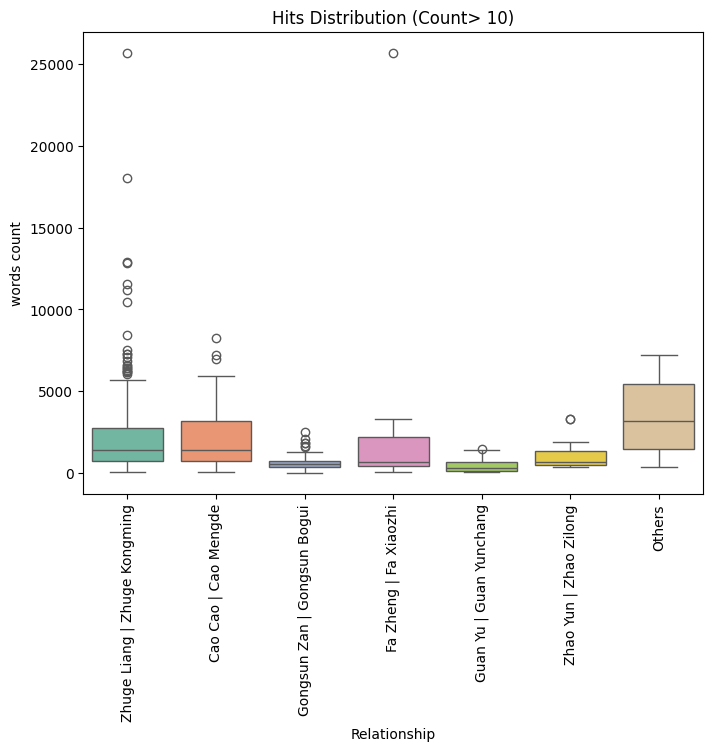

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=hits_dict, palette = "Set2")
plt.title('Hits Distribution (Count> 10)')
plt.xlabel('Relationship')
plt.xticks(ticks=plt.xticks()[0], labels=shortened_label)
plt.xticks(rotation=90)
plt.ylabel('words count')
plt.show()

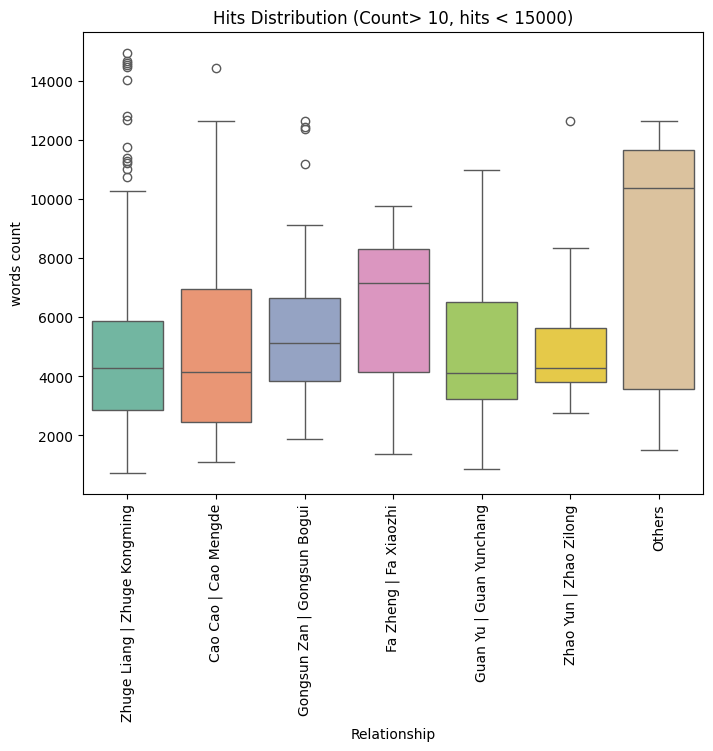

In [ ]:
hits_dict_rm_outlier = words_dict

for key, value in words_dict_rm_outlier.items():
    hits_dict_rm_outlier[key] = [x for x in value if x < 15000]


plt.figure(figsize=(8, 6))
sns.boxplot(data=hits_dict_rm_outlier, palette = "Set2")
plt.title('Hits Distribution (Count> 10, hits < 15000)')
plt.xlabel('Relationship')
plt.xticks(ticks=plt.xticks()[0], labels=shortened_label)
plt.xticks(rotation=90)
plt.ylabel('words count')
plt.show()

In [ ]:
bookmarks_dict = {}
#initialize dict
for ship in over_10_cnt:
  bookmarks_dict[ship] = []

for i in range(len(filtered['relationship'])):
    try:
        ship_string = filtered['relationship'][i]
        ship_list = ship_string.split(', ')
        ship_list_stripped = [x.strip() for x in ship_list]
        mapped = []
        for x in ship_list_stripped:
            if x in mapping:
                tm = mapping[x]
                mapped.append(tm)
            else:
                pass
        deduped = np.unique(mapped)
        for ship in deduped:
          if ship in bookmarks_dict:
            bookmarks_dict[ship].append(int(filtered['bookmarks'][i]))
    except:
        pass

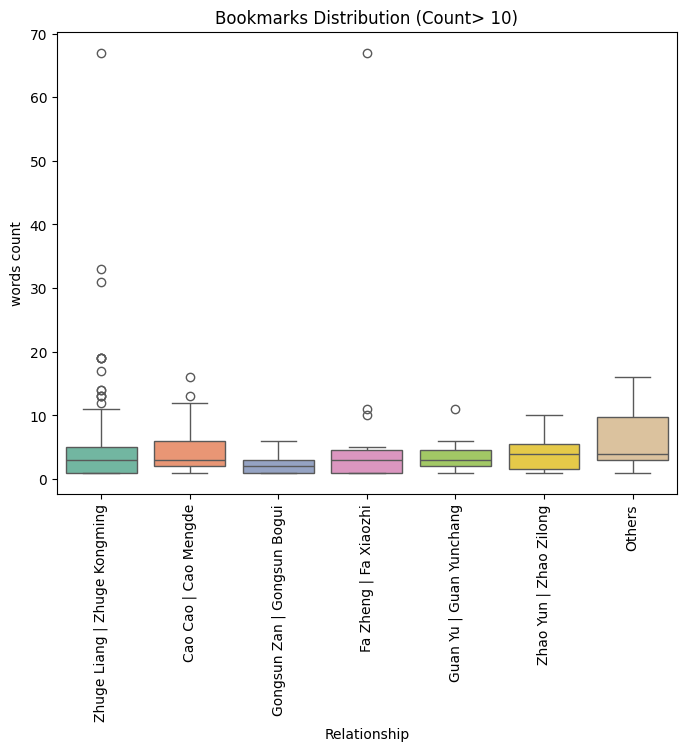

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=bookmarks_dict, palette = "Set2")
plt.title('Bookmarks Distribution (Count> 10)')
plt.xlabel('Relationship')
plt.xticks(ticks=plt.xticks()[0], labels=shortened_label)
plt.xticks(rotation=90)
plt.ylabel('words count')
plt.show()

# NSFW Analysis

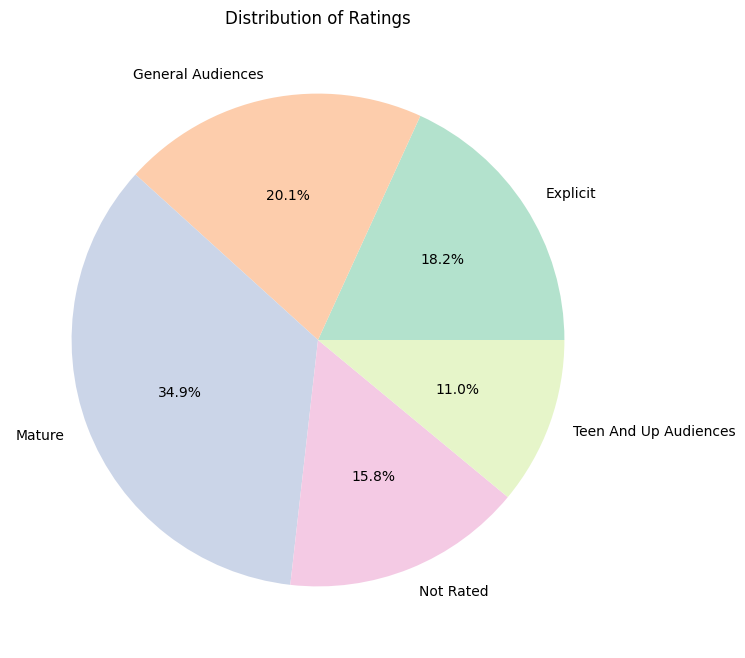

In [ ]:
#谁最纯爱
rating_counts = filtered.groupby('rating')['rating'].count()
rating_percentages = rating_counts / len(np.unique(filtered['work_id']))

pastel_palette = plt.cm.Pastel2(range(len(rating_percentages)))

plt.figure(figsize=(8, 8))
plt.pie(rating_percentages, labels=rating_percentages.index, autopct='%1.1f%%', colors=pastel_palette)
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
ship_mature_cnt = Counter()
for i in range(len(filtered['relationship'])):
    try:
        ship_string = filtered['relationship'][i]
        ship_list = ship_string.split(', ')
        ship_list_stripped = [x.strip() for x in ship_list]
        mapped = []
        for x in ship_list_stripped:
            if x in mapping:
                tm = mapping[x]
                mapped.append(tm)
            else:
                mapped.append('Other')
        if filtered['rating'][i] == 'Explicit' or filtered['rating'][i] == 'Mature':
          ship_mature_cnt.update(np.unique(mapped))
    except:
        pass

In [ ]:
percentage_mature = dict()
for item in ship_counter_condensed:
    if ship_mature_cnt[item] > 0:
        percentage_mature[item] = (ship_mature_cnt[item] / ship_counter_condensed[item]) * 100
    else:
        percentage_mature[item] = 0

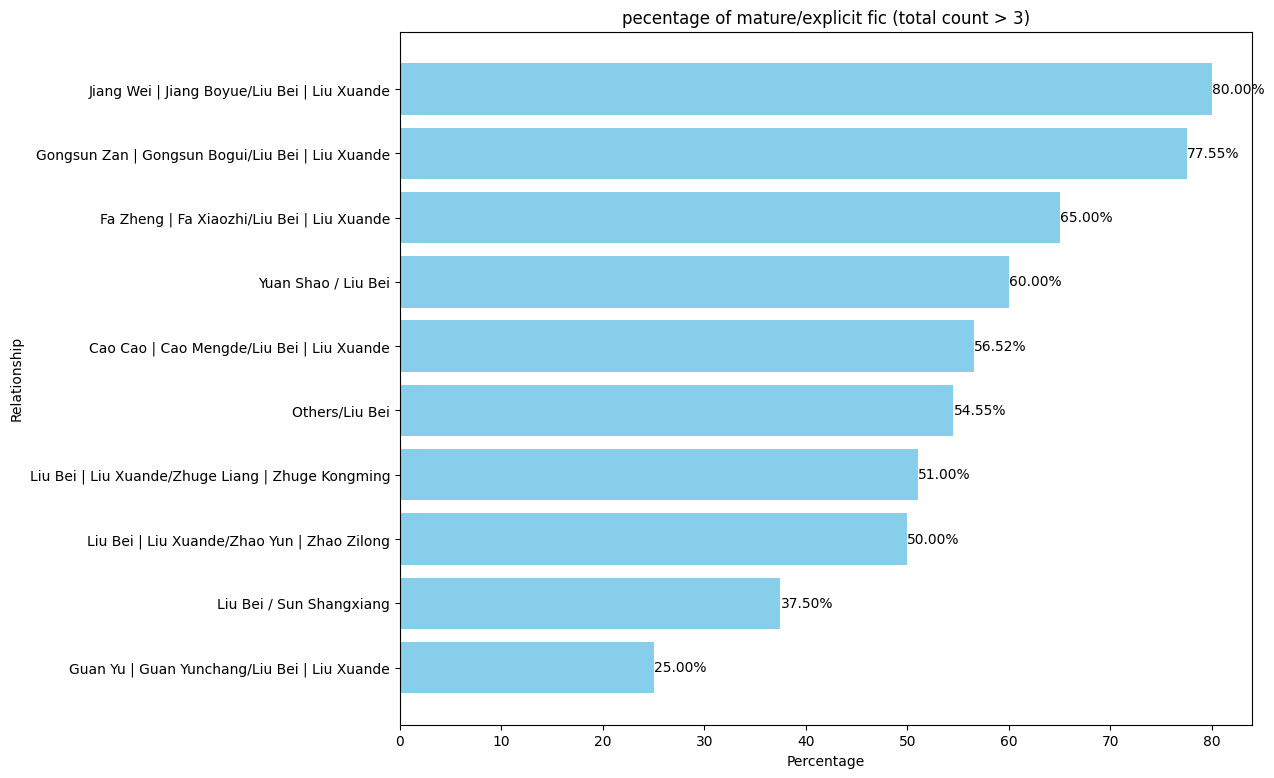

In [ ]:
#the ship must have more than 3 fics
percentage_mature_filtered = {}
for item in ship_counter_condensed:
    if ship_counter_condensed[item] > 3:
        percentage_mature_filtered[item] = percentage_mature[item]


sorted_filtered_ship_counter = dict(sorted(percentage_mature_filtered.items(), key=lambda item: item[1], reverse=True))

labels = list(sorted_filtered_ship_counter.keys())
counts = list(sorted_filtered_ship_counter.values())

plt.figure(figsize=(11, 9))
bars = plt.barh(labels, counts, color='skyblue')
plt.xlabel('Percentage')
plt.ylabel('Relationship')
plt.title('pecentage of mature/explicit fic (total count > 3)')

for bar, count in zip(bars, counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count:.2f}%',
             va='center', ha='left', fontsize=10)

plt.gca().invert_yaxis()
plt.show()


In [ ]:
ship_rape_cnt = Counter()
for i in range(len(filtered['relationship'])):
    try:
        ship_string = filtered['relationship'][i]
        ship_list = ship_string.split(', ')
        ship_list_stripped = [x.strip() for x in ship_list]
        mapped = []
        for x in ship_list_stripped:
            if x in mapping:
                tm = mapping[x]
                mapped.append(tm)
            else:
                mapped.append('Other')
        if 'Rape/Non-Con' in filtered['warnings'][i]:
          ship_rape_cnt.update(np.unique(mapped))
    except:
        pass

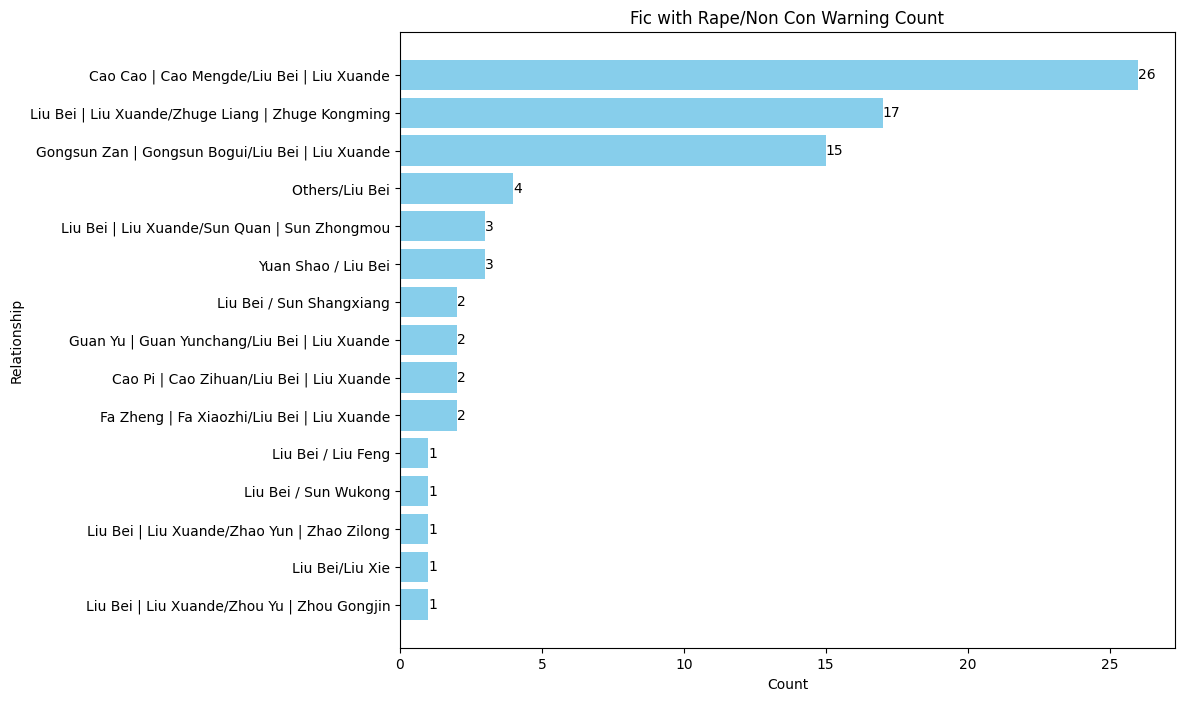

In [ ]:
ship_rape_cnt.pop('Other',None)

sorted_ship_counter = dict(sorted(ship_rape_cnt.items(), key=lambda item: item[1], reverse=True))
sorted_ship_counter

labels = list(sorted_ship_counter.keys())
counts = list(sorted_ship_counter.values())

# Creating the bar plot
plt.figure(figsize=(10, 8))
bars = plt.barh(labels, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Relationship')
plt.title('Fic with Rape/Non Con Warning Count')

# Add count labels to the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count}',
             va='center', ha='left', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

In [ ]:
percentage_rape = dict()
for item in ship_counter_condensed:
    if ship_rape_cnt[item] > 0:
        percentage_rape[item] = (ship_rape_cnt[item] / ship_counter_condensed[item]) * 100
    else:
        percentage_rape[item] = 0

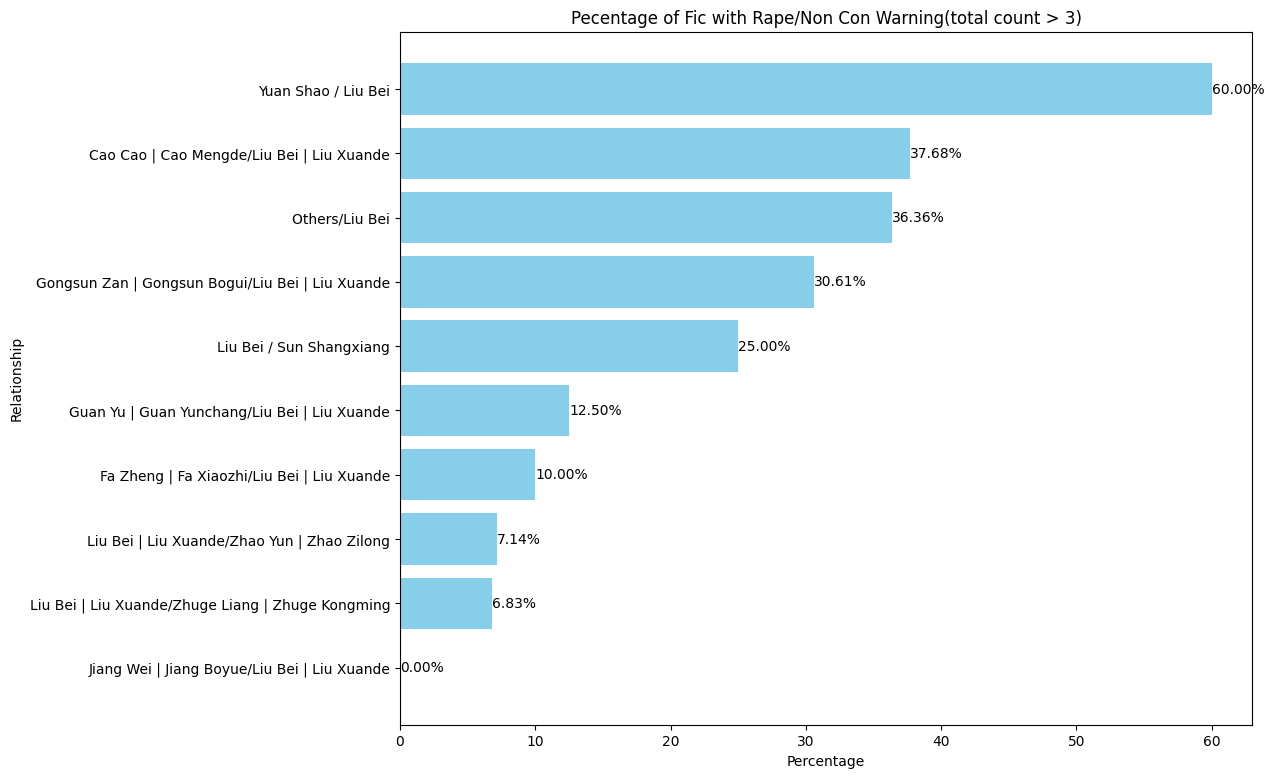

In [ ]:
#the ship must have more than 3 fics
percentage_rape_filtered = {}
for item in ship_counter_condensed:
    if ship_counter_condensed[item] > 3:
        percentage_rape_filtered[item] = percentage_rape[item]


sorted_filtered_ship_counter = dict(sorted(percentage_rape_filtered.items(), key=lambda item: item[1], reverse=True))

labels = list(sorted_filtered_ship_counter.keys())
counts = list(sorted_filtered_ship_counter.values())

plt.figure(figsize=(11, 9))
bars = plt.barh(labels, counts, color='skyblue')
plt.xlabel('Percentage')
plt.ylabel('Relationship')
plt.title('Pecentage of Fic with Rape/Non Con Warning(total count > 3)')

for bar, count in zip(bars, counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count:.2f}%',
             va='center', ha='left', fontsize=10)

plt.gca().invert_yaxis()
plt.show()